In [2]:
# Digimon Card Game: Enriquecimento de Dados com API
# ================================================

import requests
import time
import json
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 8
# Carregar os dados (ajuste o caminho se necessário)
full_data_df = pd.read_csv("../data/digimon_cards_raw.csv")

# Exibir informações gerais sobre o DataFrame
print("Informações Gerais do DataFrame:")
full_data_df.info()

Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             30 non-null     object 
 1   type             30 non-null     object 
 2   id               30 non-null     object 
 3   level            12 non-null     float64
 4   play_cost        30 non-null     int64  
 5   evolution_cost   12 non-null     float64
 6   evolution_color  4 non-null      object 
 7   evolution_level  3 non-null      float64
 8   xros_req         5 non-null      object 
 9   color            30 non-null     object 
 10  color2           3 non-null      object 
 11  digi_type        22 non-null     object 
 12  digi_type2       2 non-null      object 
 13  form             13 non-null     object 
 14  dp               22 non-null     float64
 15  attribute        12 non-null     object 
 16  rarity           30 non-null   

In [6]:
# Filtrar linhas onde name ou id estão nulos
missing_data = full_data_df[full_data_df['name'].isnull() | full_data_df['id'].isnull()]

# Exibir o resultado
print(f"Número de cartas com nome ou código nulo: {len(missing_data)}")
display(missing_data)

Número de cartas com nome ou código nulo: 0


,name,type,id,level,play_cost,evolution_cost,evolution_color,evolution_level,xros_req,color,...,artist,main_effect,source_effect,alt_effect,series,pretty_url,date_added,tcgplayer_name,tcgplayer_id,set_name


Distribuição de Tipos de Carta:
type
Digimon    22
Option      8
Name: count, dtype: int64


C:\Users\Paulo Aragao\AppData\Local\Temp\ipykernel_13928\2077606883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=full_data_df['type'], order=full_data_df['type'].value_counts().index, palette='viridis')


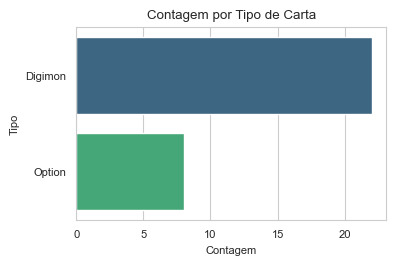

In [7]:
# Análise da coluna 'type'
print("Distribuição de Tipos de Carta:")
print(full_data_df['type'].value_counts())

plt.figure(figsize=(4, 2.5))
sns.countplot(y=full_data_df['type'], order=full_data_df['type'].value_counts().index, palette='viridis')
plt.title('Contagem por Tipo de Carta')
plt.xlabel('Contagem')
plt.ylabel('Tipo')
plt.show()

Distribuição de Raridades:
rarity
c     8
U     5
r     5
u     3
P     3
SR    2
p     1
R     1
C     1
sr    1
Name: count, dtype: int64


C:\Users\Paulo Aragao\AppData\Local\Temp\ipykernel_13928\2609064746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=full_data_df['rarity'], order=full_data_df['rarity'].value_counts().index, palette='plasma')


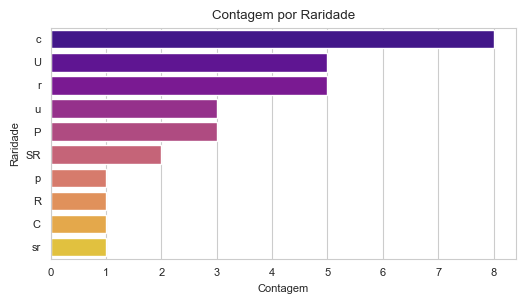

In [8]:
# Análise da coluna 'rarity'
print("Distribuição de Raridades:")
print(full_data_df['rarity'].value_counts())

plt.figure(figsize=(6, 3))
sns.countplot(y=full_data_df['rarity'], order=full_data_df['rarity'].value_counts().index, palette='plasma')
plt.title('Contagem por Raridade')
plt.xlabel('Contagem')
plt.ylabel('Raridade')
plt.show()


Distribuição de Raridades Após a Limpeza:
rarity
C     9
U     8
R     6
P     4
SR    3
Name: count, dtype: int64


C:\Users\Paulo Aragao\AppData\Local\Temp\ipykernel_13928\1360675509.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=full_data_df['rarity'], order=full_data_df['rarity'].value_counts().index, palette='plasma')


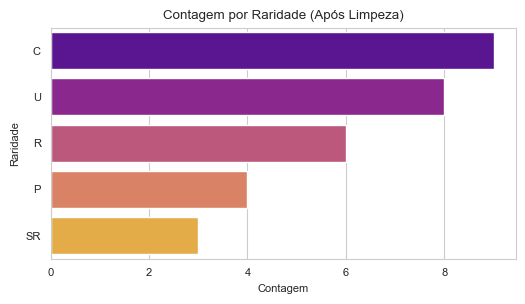

In [9]:
# Padronizando a coluna 'rarity' para letras maiúsculas
full_data_df['rarity'] = full_data_df['rarity'].str.upper()

# Verificando o resultado da limpeza
print("\nDistribuição de Raridades Após a Limpeza:")
print(full_data_df['rarity'].value_counts())

plt.figure(figsize=(6, 3))
sns.countplot(y=full_data_df['rarity'], order=full_data_df['rarity'].value_counts().index, palette='plasma')
plt.title('Contagem por Raridade (Após Limpeza)')
plt.xlabel('Contagem')
plt.ylabel('Raridade')
plt.show()

Distribuição de Cores:
color
Purple    609
Red       595
Black     593
Blue      571
Green     558
Yellow    554
White     125
Name: count, dtype: int64


C:\Users\Paulo Aragao\AppData\Local\Temp\ipykernel_43016\3394996049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


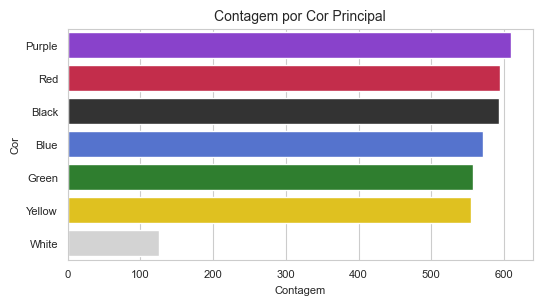

In [55]:
# 1. Criar o dicionário que mapeia o nome da cor para uma cor real
# Usamos 'gold' para Yellow e 'lightgray' para White para melhor visualização.
color_map = {
    'Purple': '#8A2BE2', # BlueViolet
    'Red': '#DC143C',    # Crimson
    'Black': '#333333',    # Um cinza bem escuro, quase preto
    'Blue': '#4169E1',   # RoyalBlue
    'Green': '#228B22',   # ForestGreen
    'Yellow': '#FFD700',  # Gold
    'White': '#D3D3D3'   # LightGray (para ser visível no fundo branco)
}

# 2. Obter a ordem correta das barras (da mais frequente para a menos)
# Isso garante que o Seaborn desenhe na ordem que queremos.
bar_order = full_data_df['color'].value_counts().index

# 3. Gerar o gráfico usando o nosso mapa de cores personalizado na paleta
print("Distribuição de Cores:")
print(full_data_df['color'].value_counts())

plt.figure(figsize=(6, 3))
sns.countplot(
    y=full_data_df['color'], 
    order=bar_order,
    palette=color_map  # Aqui está a mágica! Passamos nosso mapa de cores.
)

plt.title('Contagem por Cor Principal', fontsize=10)
plt.xlabel('Contagem', fontsize=8)
plt.ylabel('Cor', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Resumo Estatístico das Colunas Numéricas:
         play_cost  evolution_cost            dp        level
count  3396.000000     2623.000000   2705.000000  2890.000000
mean      6.054181        2.411361   6519.778189     4.356055
std       3.438499        1.546032   3903.002555     1.295226
min       0.000000        0.000000      0.000000     2.000000
25%       3.000000        2.000000   4000.000000     3.000000
50%       5.000000        3.000000   6000.000000     4.000000
75%       8.000000        3.000000  10000.000000     5.000000
max      20.000000        8.000000  17000.000000     7.000000


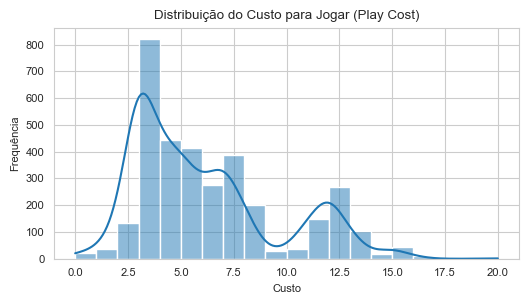

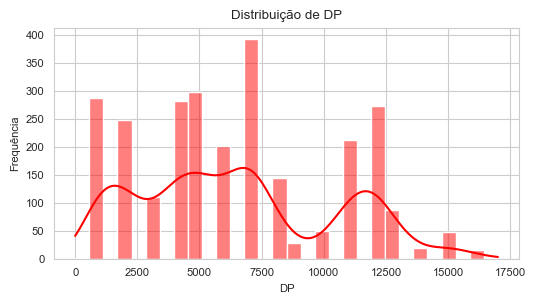

In [56]:
# Resumo estatístico das colunas numéricas
print("Resumo Estatístico das Colunas Numéricas:")
print(full_data_df[['play_cost', 'evolution_cost', 'dp', 'level']].describe())

# Histograma do Custo para Jogar (Play Cost)
plt.figure(figsize=(6, 3))
sns.histplot(full_data_df['play_cost'].dropna(), bins=20, kde=True)
plt.title('Distribuição do Custo para Jogar (Play Cost)')
plt.xlabel('Custo')
plt.ylabel('Frequência')
plt.show()

# Histograma do DP (Digimon Power)
plt.figure(figsize=(6, 3))
sns.histplot(full_data_df['dp'].dropna(), bins=30, kde=True, color='red')
plt.title('Distribuição de DP')
plt.xlabel('DP')
plt.ylabel('Frequência')
plt.show()

In [61]:
# Exemplo de como salvar o DataFrame limpo em um novo CSV
full_data_df.to_csv('../data/digimon_cards_clean.csv', index=False)

# E para gerar o JSON que a sua aplicação web vai usar:
full_data_df.to_json('../data/digimon_cards_full.json', orient='records', indent=2)